In [61]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt  

import seaborn as sns

In [62]:
file_path = "../data/raw/DDos.csv"

df = pd.read_csv(file_path)

df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66237 entries, 0 to 66236
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             66237 non-null  int64  
 1    Flow Duration                66237 non-null  int64  
 2    Total Fwd Packets            66237 non-null  int64  
 3    Total Backward Packets       66237 non-null  int64  
 4   Total Length of Fwd Packets   66237 non-null  int64  
 5    Total Length of Bwd Packets  66237 non-null  int64  
 6    Fwd Packet Length Max        66237 non-null  int64  
 7    Fwd Packet Length Min        66237 non-null  int64  
 8    Fwd Packet Length Mean       66237 non-null  float64
 9    Fwd Packet Length Std        66237 non-null  float64
 10  Bwd Packet Length Max         66237 non-null  int64  
 11   Bwd Packet Length Min        66237 non-null  int64  
 12   Bwd Packet Length Mean       66237 non-null  float64
 13   

#### Data preprocessing

In [64]:
df.isnull().sum()

 Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      1
 Idle Std                      1
 Idle Max                      1
 Idle Min                      1
 Label                         1
Length: 79, dtype: int64

In [65]:
df.columns = df.columns.str.strip()

In [66]:
df.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS', nan], dtype=object)

In [67]:
df['Label'].value_counts()


Label
DDoS      34952
BENIGN    31284
Name: count, dtype: int64

In [68]:
data_nona=df.dropna()

In [69]:
data_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66236 entries, 0 to 66235
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             66236 non-null  int64  
 1   Flow Duration                66236 non-null  int64  
 2   Total Fwd Packets            66236 non-null  int64  
 3   Total Backward Packets       66236 non-null  int64  
 4   Total Length of Fwd Packets  66236 non-null  int64  
 5   Total Length of Bwd Packets  66236 non-null  int64  
 6   Fwd Packet Length Max        66236 non-null  int64  
 7   Fwd Packet Length Min        66236 non-null  int64  
 8   Fwd Packet Length Mean       66236 non-null  float64
 9   Fwd Packet Length Std        66236 non-null  float64
 10  Bwd Packet Length Max        66236 non-null  int64  
 11  Bwd Packet Length Min        66236 non-null  int64  
 12  Bwd Packet Length Mean       66236 non-null  float64
 13  Bwd Packet Length Std

In [70]:
data_nona['Label'].value_counts()

Label
DDoS      34952
BENIGN    31284
Name: count, dtype: int64

In [71]:
data_nona.loc[:,'Label'].unique()

array(['BENIGN', 'DDoS'], dtype=object)

In [72]:
data_nona.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,6.623600e+04,66236.000000,66236.000000,66236.000000,66236.000000,...,66236.000000,66236.000000,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04,6.623600e+04
mean,6454.701794,1.388757e+07,5.180295,5.119225,695.632677,6.716764e+03,351.447068,23.466151,110.716876,135.440531,...,3.447793,22.101455,1.585840e+05,2.020972e+04,1.949634e+05,1.470892e+05,8.153964e+06,2.602819e+06,9.997795e+06,6.297389e+06
std,16711.002247,2.815859e+07,16.873784,23.797303,3230.070242,4.222729e+04,1435.520764,136.609404,400.379518,613.426001,...,13.108006,4.844533,8.489147e+05,3.050515e+05,1.028144e+06,8.214214e+05,1.804617e+07,9.841559e+06,2.187645e+07,1.642701e+07
min,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,80.000000,4.995450e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,...,1.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,9.949430e+05,3.000000,4.000000,30.000000,2.020000e+02,20.000000,0.000000,8.666667,0.000000,...,2.000000,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,80.000000,7.640073e+06,5.000000,5.000000,64.000000,1.160100e+04,38.000000,6.000000,35.000000,10.263203,...,4.000000,20.000000,1.005000e+03,0.000000e+00,1.005000e+03,1.005000e+03,7.410306e+06,0.000000e+00,7.415575e+06,6.526832e+06
max,61538.000000,1.199983e+08,1681.000000,2942.000000,120783.000000,4.991419e+06,11680.000000,1472.000000,3867.000000,6692.644993,...,1680.000000,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08


#### Explore the data

In [73]:
# Filter for DDoS attacks
ddos_df = data_nona[data_nona['Label'] == 'DDoS']


In [74]:
# Get basic statistics for DDoS data
print(ddos_df.describe())


       Destination Port  Flow Duration  Total Fwd Packets  \
count           34952.0   3.495200e+04       34952.000000   
mean               80.0   1.370784e+07           4.317550   
std                 0.0   2.561829e+07           1.834958   
min                80.0   0.000000e+00           1.000000   
25%                80.0   5.786868e+05           3.000000   
50%                80.0   1.701951e+06           4.000000   
75%                80.0   8.379818e+06           5.000000   
max                80.0   8.137270e+07          10.000000   

       Total Backward Packets  Total Length of Fwd Packets  \
count            34952.000000                 34952.000000   
mean                 3.345989                    31.113870   
std                  2.538891                    11.401108   
min                  0.000000                     6.000000   
25%                  0.000000                    26.000000   
50%                  4.000000                    26.000000   
75%             

1. Most of the DDoS attacks are targeting **port 80**, which is commonly used for HTTP traffic. This is typical because attackers often target web services.
2. The duration of DDoS attack flows varies greatly. A very high Flow Duration could indicate a long-lasting attack. For instance, an attack lasting 13 seconds could be a sustained attempt to overwhelm the server.
3. Total Length of Forward Packets "Forward" means the direction from the sender (in this case,  the attacker) to the receiver (the target of the DDoS attack).
- *Ping Flood* Attack. The attacker attempts to overwhelm a targeted device with ICMP echo-request packets Each ping might be around 28-32 bytes.This fits our mean of 31.11 bytes.The server gets overwhelmed trying to respond to all these small messages.
- *SYN Flood* Attack.A type of network-based denial-of-service (DoS) attack in which an attacker overwhelms a target system by sending a large number of SYN (synchronize) requests to the target's server. 
- *Low-and-Slow* Attack. This type of attack uses seemingly normal traffic but in a way that exhausts server resources.Packet sizes might vary more, explaining our standard deviation of 11.40 bytes.The attack is harder to detect because it mimics normal traffic patterns.
- *Amplification Attack* This type of attack involves larger packets, but our statistics suggest a different approach of the attacks with a maximum of 68 bytes which is still small.
4. 


In [75]:
ddos_data = data_nona[data_nona['Label'] == 'DDoS']

ddos_data['Destination Port'].value_counts()

Destination Port
80    34952
Name: count, dtype: int64

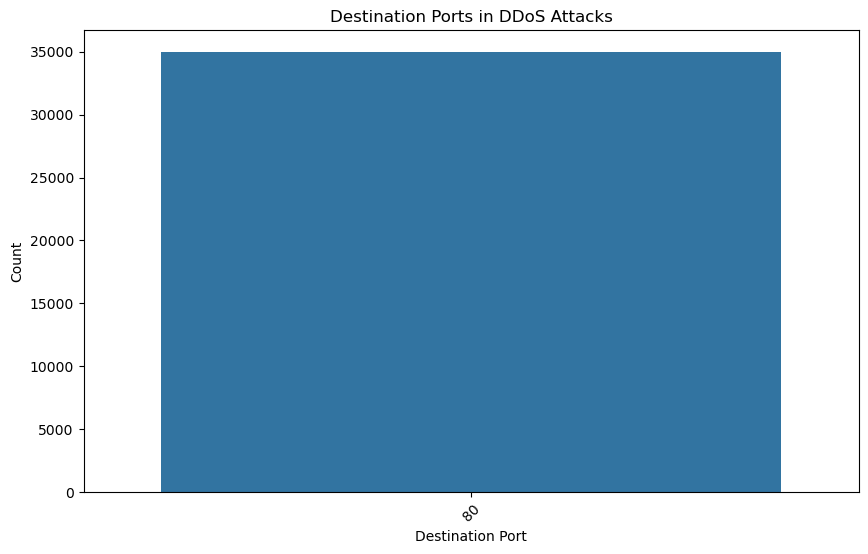

In [76]:

# Plot the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Destination Port', data=ddos_data)
plt.title('Destination Ports in DDoS Attacks')
plt.xlabel('Destination Port')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



In [77]:
ddos_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34952 entries, 18877 to 66235
Data columns (total 79 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Destination Port             34952 non-null  int64  
 1   Flow Duration                34952 non-null  int64  
 2   Total Fwd Packets            34952 non-null  int64  
 3   Total Backward Packets       34952 non-null  int64  
 4   Total Length of Fwd Packets  34952 non-null  int64  
 5   Total Length of Bwd Packets  34952 non-null  int64  
 6   Fwd Packet Length Max        34952 non-null  int64  
 7   Fwd Packet Length Min        34952 non-null  int64  
 8   Fwd Packet Length Mean       34952 non-null  float64
 9   Fwd Packet Length Std        34952 non-null  float64
 10  Bwd Packet Length Max        34952 non-null  int64  
 11  Bwd Packet Length Min        34952 non-null  int64  
 12  Bwd Packet Length Mean       34952 non-null  float64
 13  Bwd Packet Length

In [78]:
# Convert the labels in the DataFrame to numerical values
# data_nona['Label'] = data_nona['Label'].map({'BENIGN': 0, 'DDoS': 1})

In [79]:
data_nona.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


##### analyzing traffic volume features

C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1634798933.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1634798933.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1634798933.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1634798933.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

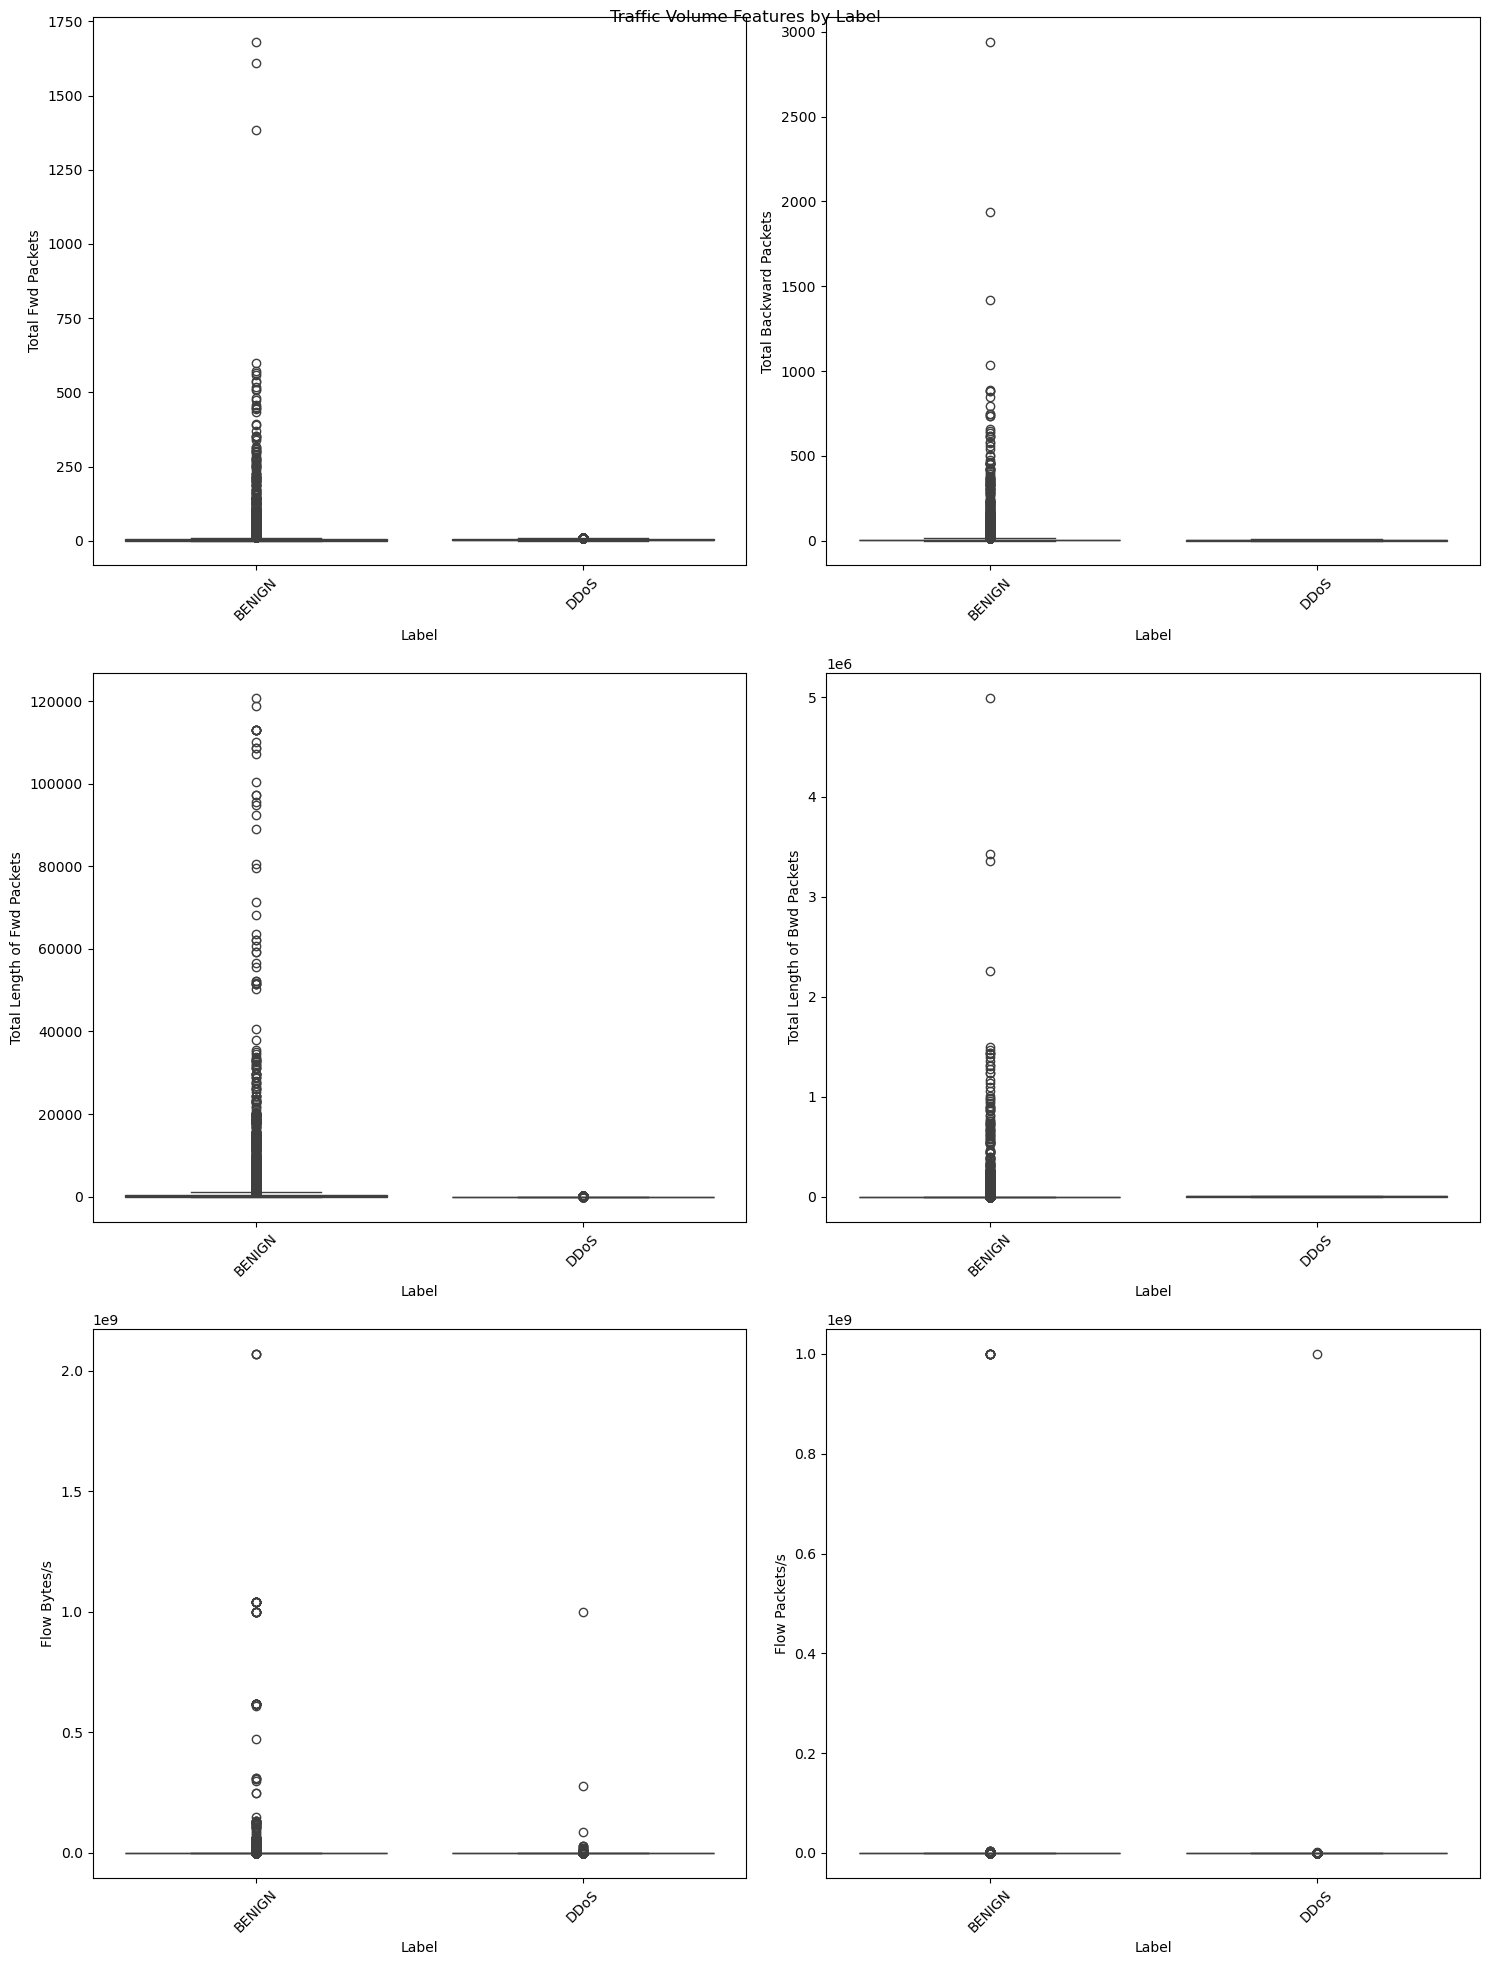

In [80]:
# Analyze basic traffic volume features
volume_features = ['Total Fwd Packets', 'Total Backward Packets', 
                   'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
                   'Flow Bytes/s', 'Flow Packets/s']

# Create box plots for these features, grouped by Label
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Traffic Volume Features by Label')

for i, feature in enumerate(volume_features):
    sns.boxplot(x='Label', y=feature, data=data_nona, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


In [81]:
# Calculate mean values for each feature, grouped by Label
mean_values = data_nona.groupby('Label')[volume_features].mean()
print("\nMean values of traffic volume features by Label:")
print(mean_values)


Mean values of traffic volume features by Label:
        Total Fwd Packets  Total Backward Packets  \
Label                                               
BENIGN           6.144195                7.100371   
DDoS             4.317550                3.345989   

        Total Length of Fwd Packets  Total Length of Bwd Packets  \
Label                                                              
BENIGN                  1438.065273                  5775.932394   
DDoS                      31.113870                  7558.860151   

        Flow Bytes/s  Flow Packets/s  
Label                                 
BENIGN  1.924904e+06   294289.939409  
DDoS    8.929141e+04    28806.235606  


-  *Total Length of Fwd Packets and Total Length of Bwd Packets During a DDoS attack*, the data sent forward is very small (around 31 bytes), and the data sent back is larger (around 7559 bytes). This might indicate an attack pattern where many small requests are sent to provoke larger responses, aiming to exhaust server resources.
- *Flow Bytes/s and Flow Packets/s* During a DDoS attack, the data transfer rate is lower at about 89,291 bytes per second, but the packet rate is still significant at about 28,806 packets per second. This could represent an attack designed to overwhelm the server with many small packets rather than large volumes of data.
- *Total Fwd Packets and Total Backward Packets*  During a DDoS attack, the source sends about 4 packets, and the destination sends back about 3 packets. This lower number of packets could indicate that the attack traffic is designed to overwhelm the server with many small requests, disrupting normal communication.

#####  analyzing the timing-related features

C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1770841354.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1770841354.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1770841354.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\1770841354.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

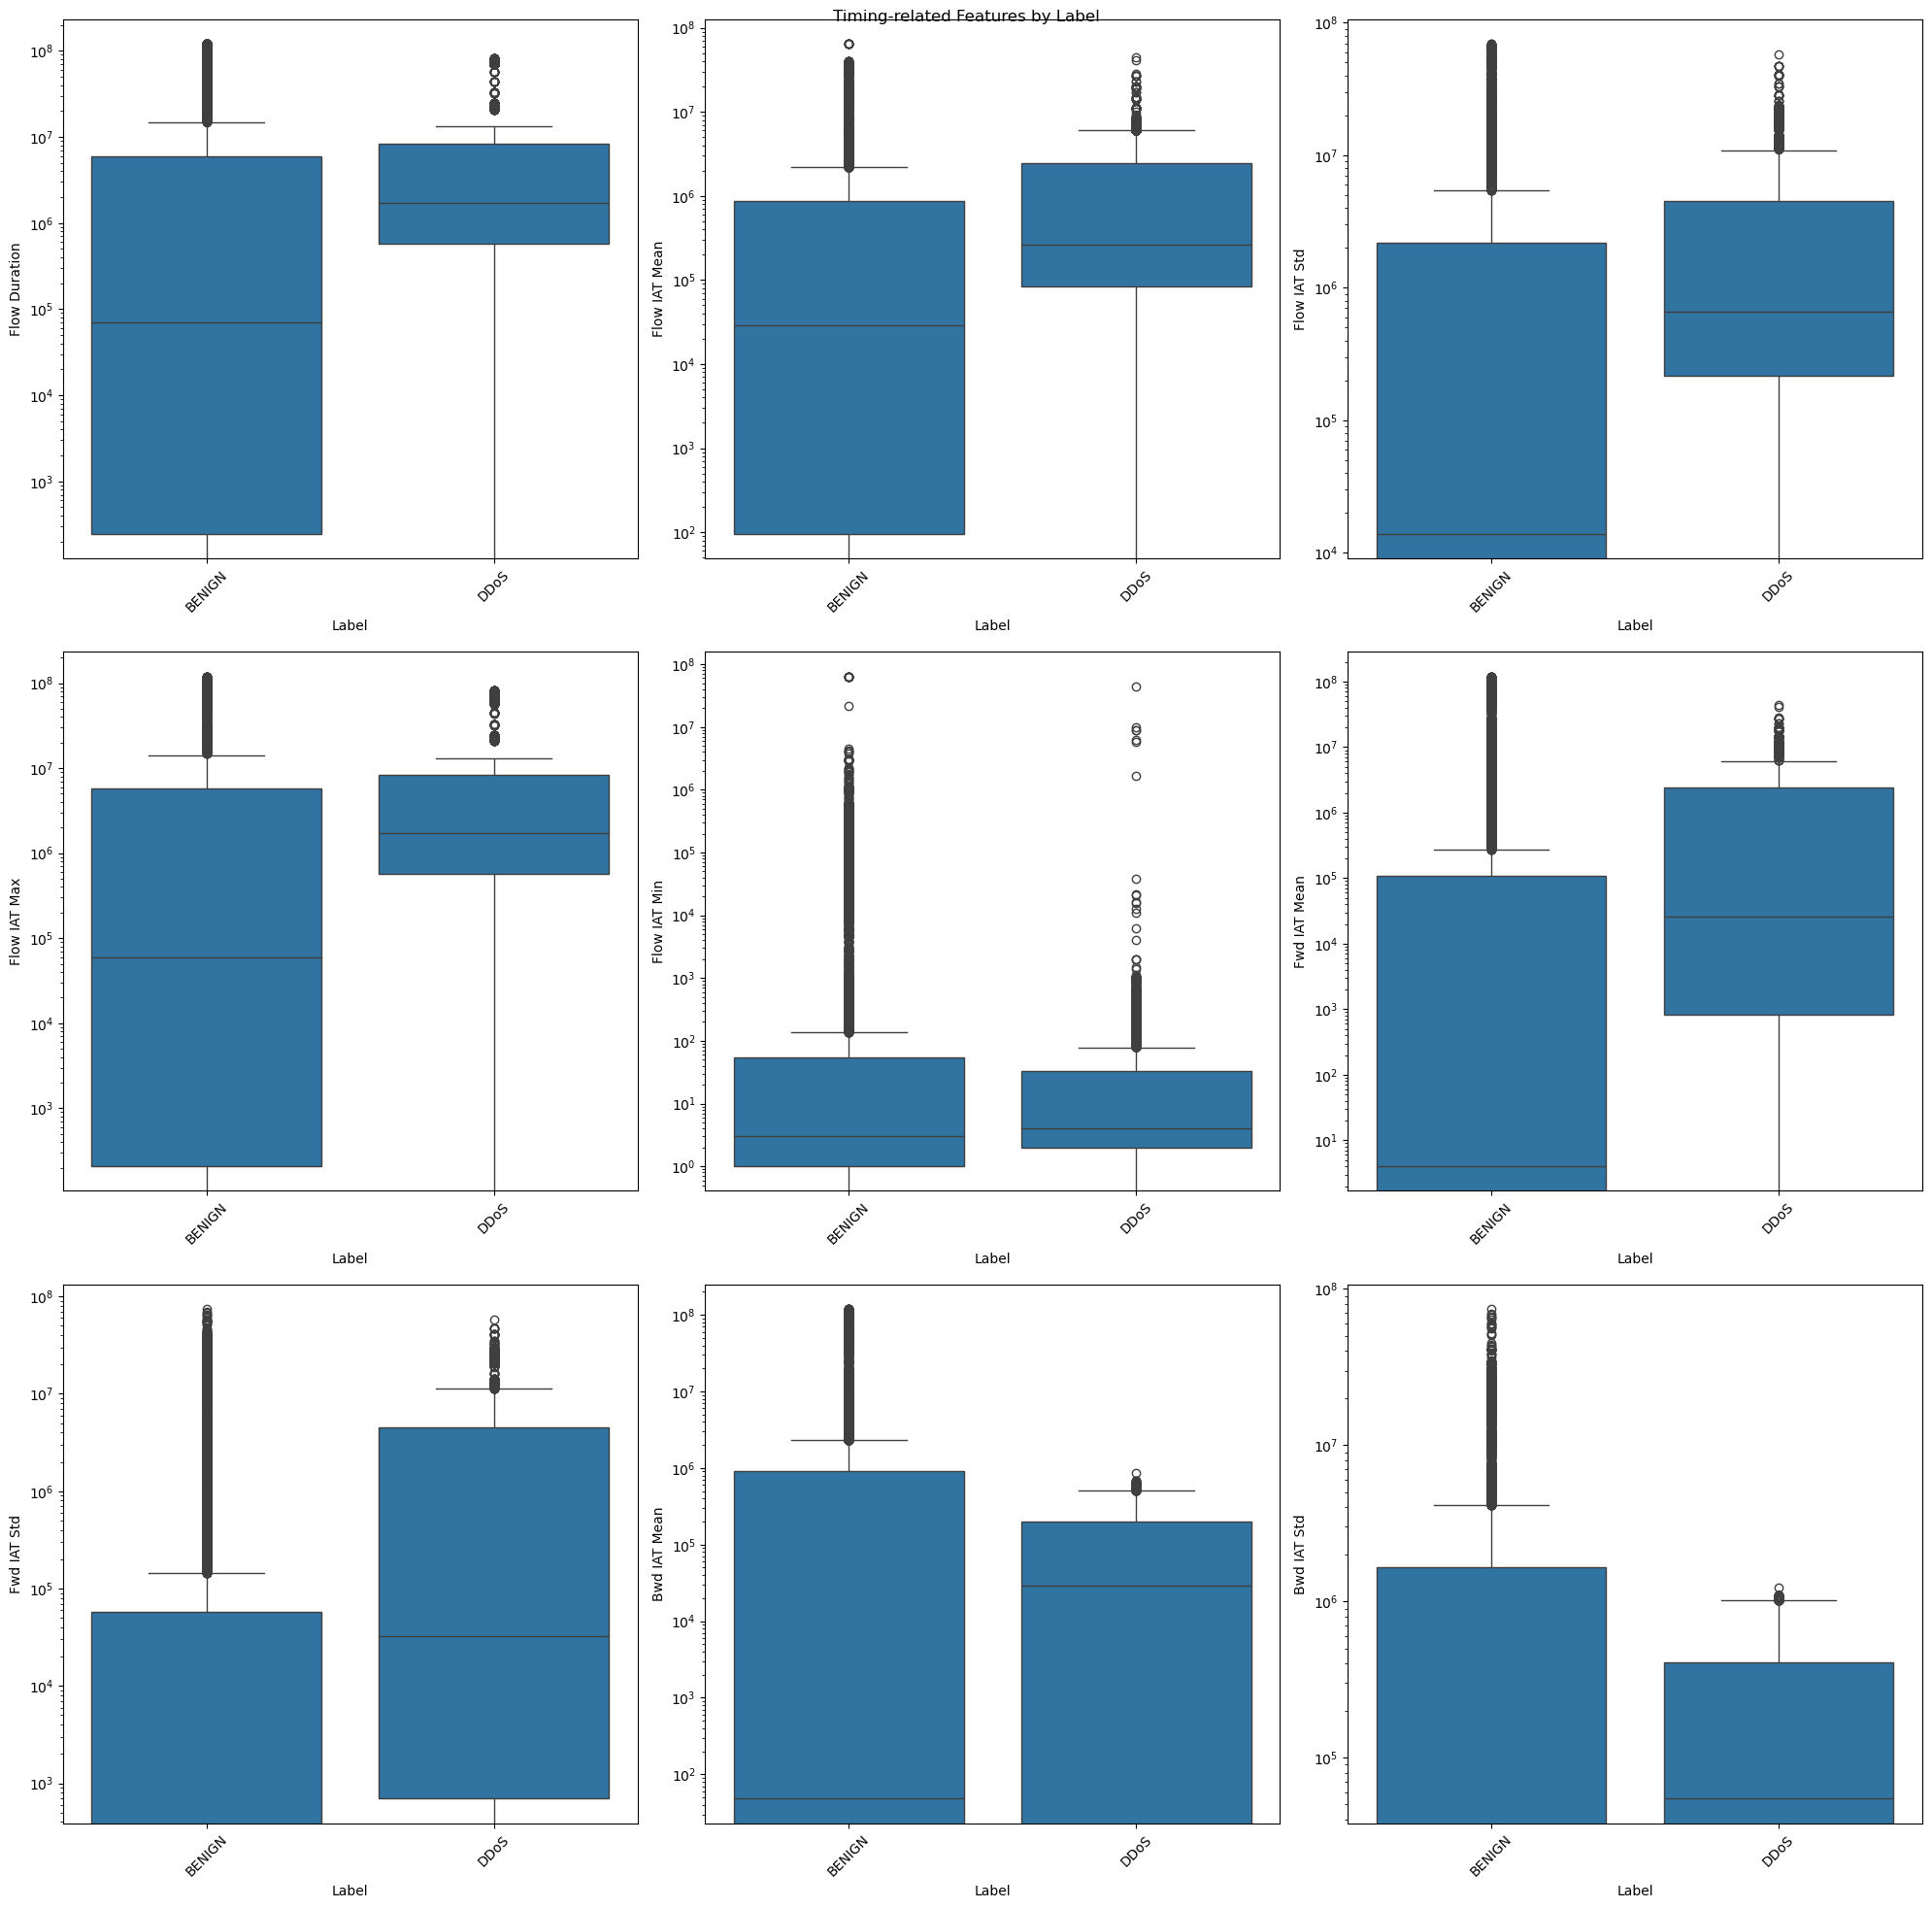

In [82]:
# Analyze timing-related features
timing_features = ['Flow Duration', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
                   'Fwd IAT Mean', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std']

# Create box plots for these features, grouped by Label
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Timing-related Features by Label')

for i, feature in enumerate(timing_features):
    sns.boxplot(x='Label', y=feature, data=data_nona, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_xticklabels(axes[i//3, i%3].get_xticklabels(), rotation=45)
    axes[i//3, i%3].set_yscale('log')  # Using log scale for better visualization

plt.tight_layout()
plt.show()


Median values of timing-related features by Label:
        Flow Duration  Flow IAT Mean  Flow IAT Std  Flow IAT Max  \
Label                                                              
BENIGN        69813.5    28822.79412   13858.28302       59345.0   
DDoS        1701951.0   260481.67855  656835.75860     1699807.0   

        Flow IAT Min  Fwd IAT Mean   Fwd IAT Std  Bwd IAT Mean  Bwd IAT Std  
Label                                                                        
BENIGN           3.0           4.0      0.000000         48.00       0.0000  
DDoS             4.0       26200.5  32455.140595      28799.75   54445.2765  


C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\3494521090.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nona['Fwd_Bwd_IAT_Ratio'] = data_nona['Fwd IAT Mean'] / data_nona['Bwd IAT Mean']


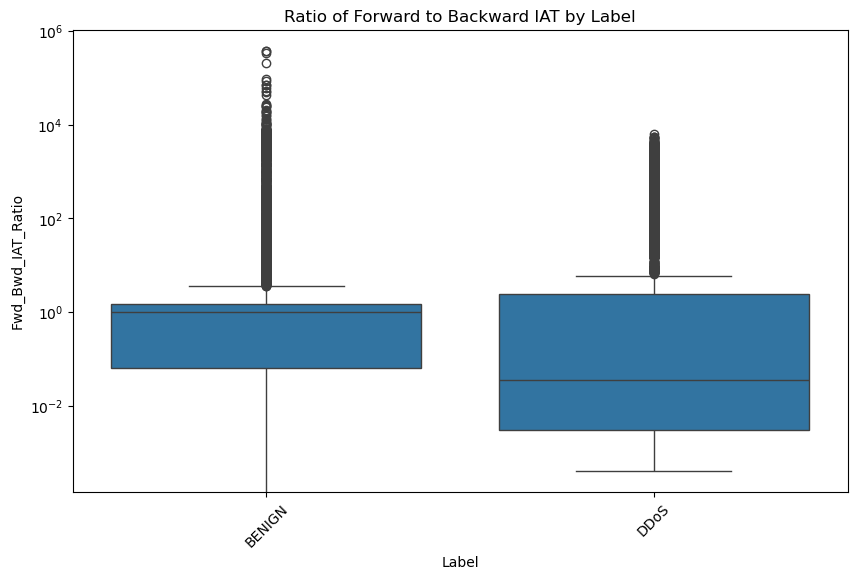

In [83]:
median_values = data_nona.groupby('Label')[timing_features].median()
print("\nMedian values of timing-related features by Label:")
print(median_values)

# Calculate the ratio of Fwd to Bwd IAT for each flow
data_nona['Fwd_Bwd_IAT_Ratio'] = data_nona['Fwd IAT Mean'] / data_nona['Bwd IAT Mean']

# Plot the distribution of this ratio
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Fwd_Bwd_IAT_Ratio', data=data_nona)
plt.title('Ratio of Forward to Backward IAT by Label')
plt.yscale('log')
plt.xticks(rotation=45)
plt.show()

- *Flow Duration* - A typical non-malicious interaction might last around 70 milliseconds. During a DDoS attack, the flow lasts longer, around 1.7 seconds. This could be due to the attack sending a continuous stream of packets over a longer period to overwhelm the server. 
- *Flow IAT (Inter-Arrival Time)* - In normal traffic, packets arrive approximately every 29 milliseconds on average, with some variation (standard deviation of about 14 milliseconds). The longest time between packet arrivals is about 59 milliseconds, and the shortest is 3 microseconds. During a DDoS attack, packets arrive less frequently, on average every 260 milliseconds, with a much higher variation (standard deviation of about 657 milliseconds). The longest time between packet arrivals is about 1.7 seconds, and the shortest is 4 microseconds.
- *Fwd IAT (Forward Inter-Arrival Time)* -  In normal traffic, forward packets arrive almost continuously with a very short and consistent time interval (4 microseconds). During a DDoS attack, forward packets arrive less frequently, every 26 milliseconds on average, with some variation (standard deviation of about 32 milliseconds).
- *Bwd IAT (Backward Inter-Arrival Time)* - In normal traffic, backward packets arrive almost continuously with a short and consistent time interval (48 microseconds). During a DDoS attack, backward packets arrive less frequently, every 29 milliseconds on average, with a higher variation (standard deviation of about 54 milliseconds).

**DDoS traffic** shows longer flow durations and less frequent packet arrivals with much higher variation. This suggests an attack pattern where packets are sent less frequently but over a longer duration, aimed at disrupting normal server operations by overwhelming it with irregular traffic.The irregular timing in DDoS traffic suggests the server is struggling to respond consistently, likely due to being overwhelmed.


#####  analyzing the packet flag features and packet size statistics.

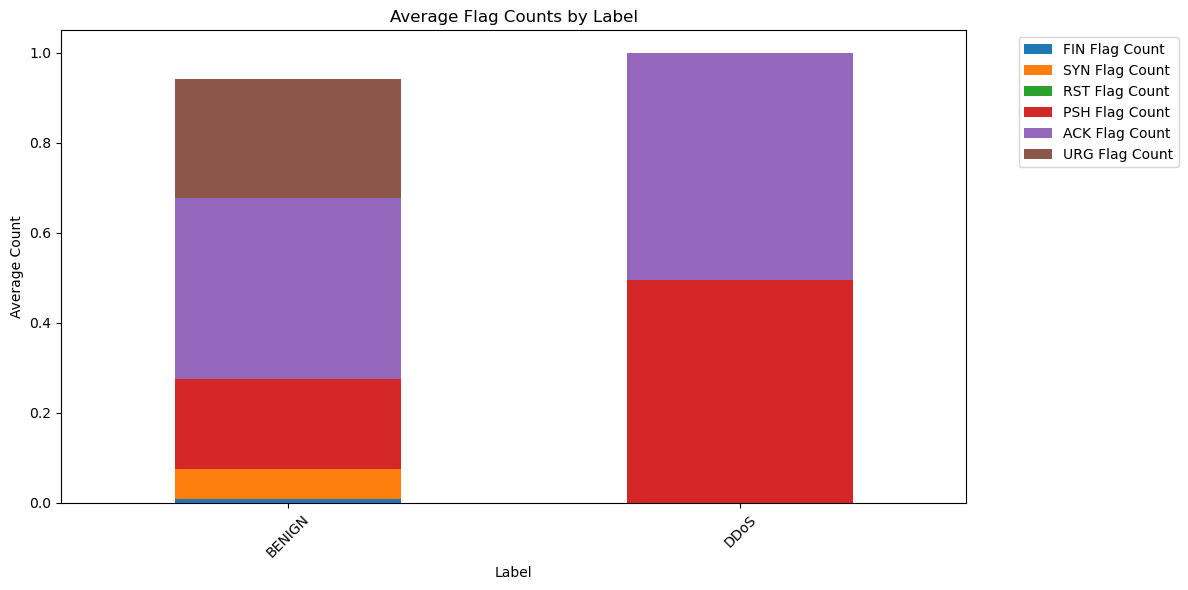

In [84]:
# Analyze packet flag features
flag_features = ['FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 
                 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count']

# Create a stacked bar plot for flag counts
flag_data = data_nona.groupby('Label')[flag_features].mean()
flag_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Average Flag Counts by Label')
plt.ylabel('Average Count')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [89]:
# Calculate the mean values of flag counts grouped by the 'Label'
flag_means = data_nona.groupby('Label')[[
    'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 
    'ACK Flag Count', 'URG Flag Count', 'CWE Flag Count', 'ECE Flag Count'
]].mean()

flag_means


,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count
Label,,,,,,,,
BENIGN,0.007672,0.067734,0.00016,0.199687,0.401963,0.264896,0.0,0.00016
DDoS,0.000000,0.000000,0.00000,0.493992,0.506037,0.000000,0.0,0.00000


- BENIGN Traffic: Shows a balanced use of flags for normal connection management (initiation with SYN, data transfer with PSH, acknowledgments with ACK, termination with FIN).
- DDoS traffic is characterized by an aggressive use of PSH and ACK flags, reflecting its disruptive nature. The lack of SYN, FIN, RST, and URG flags indicates a focus on overwhelming the target rather than managing connections properly.
- A high count of PSH flags means that the attack traffic is consistently trying to push data onto the server. This floods the server’s resources and overwhelms it with data that needs immediate processing.
- A high count of ACK flags in DDoS traffic means the attack traffic is confirming the receipt of packets at a high rate, potentially in a way that forces the server to allocate resources to handle these acknowledgements.
- The absence  of SYN flags indicates that DDoS traffic isn’t trying to establish new connections. It might be exploiting existing connections or simply sending data without the need to set up new sessions.
- The absence of FIN flags indicates that the DDoS attack does not properly close connections. It leaves connections hanging, forcing the server to deal with these incomplete connections.
- The absence of RST flags means the attack does not attempt to reset connections. This prevents the server from clearing out malicious connections.
- The absence of URG flags indicates that the attack traffic does not mark data as urgent, possibly because it aims to flood with sheer volume rather than with urgency.

C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\2139202623.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\2139202623.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\2139202623.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
C:\Users\Eric\AppData\Local\Temp\ipykernel_13228\2139202623.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks()

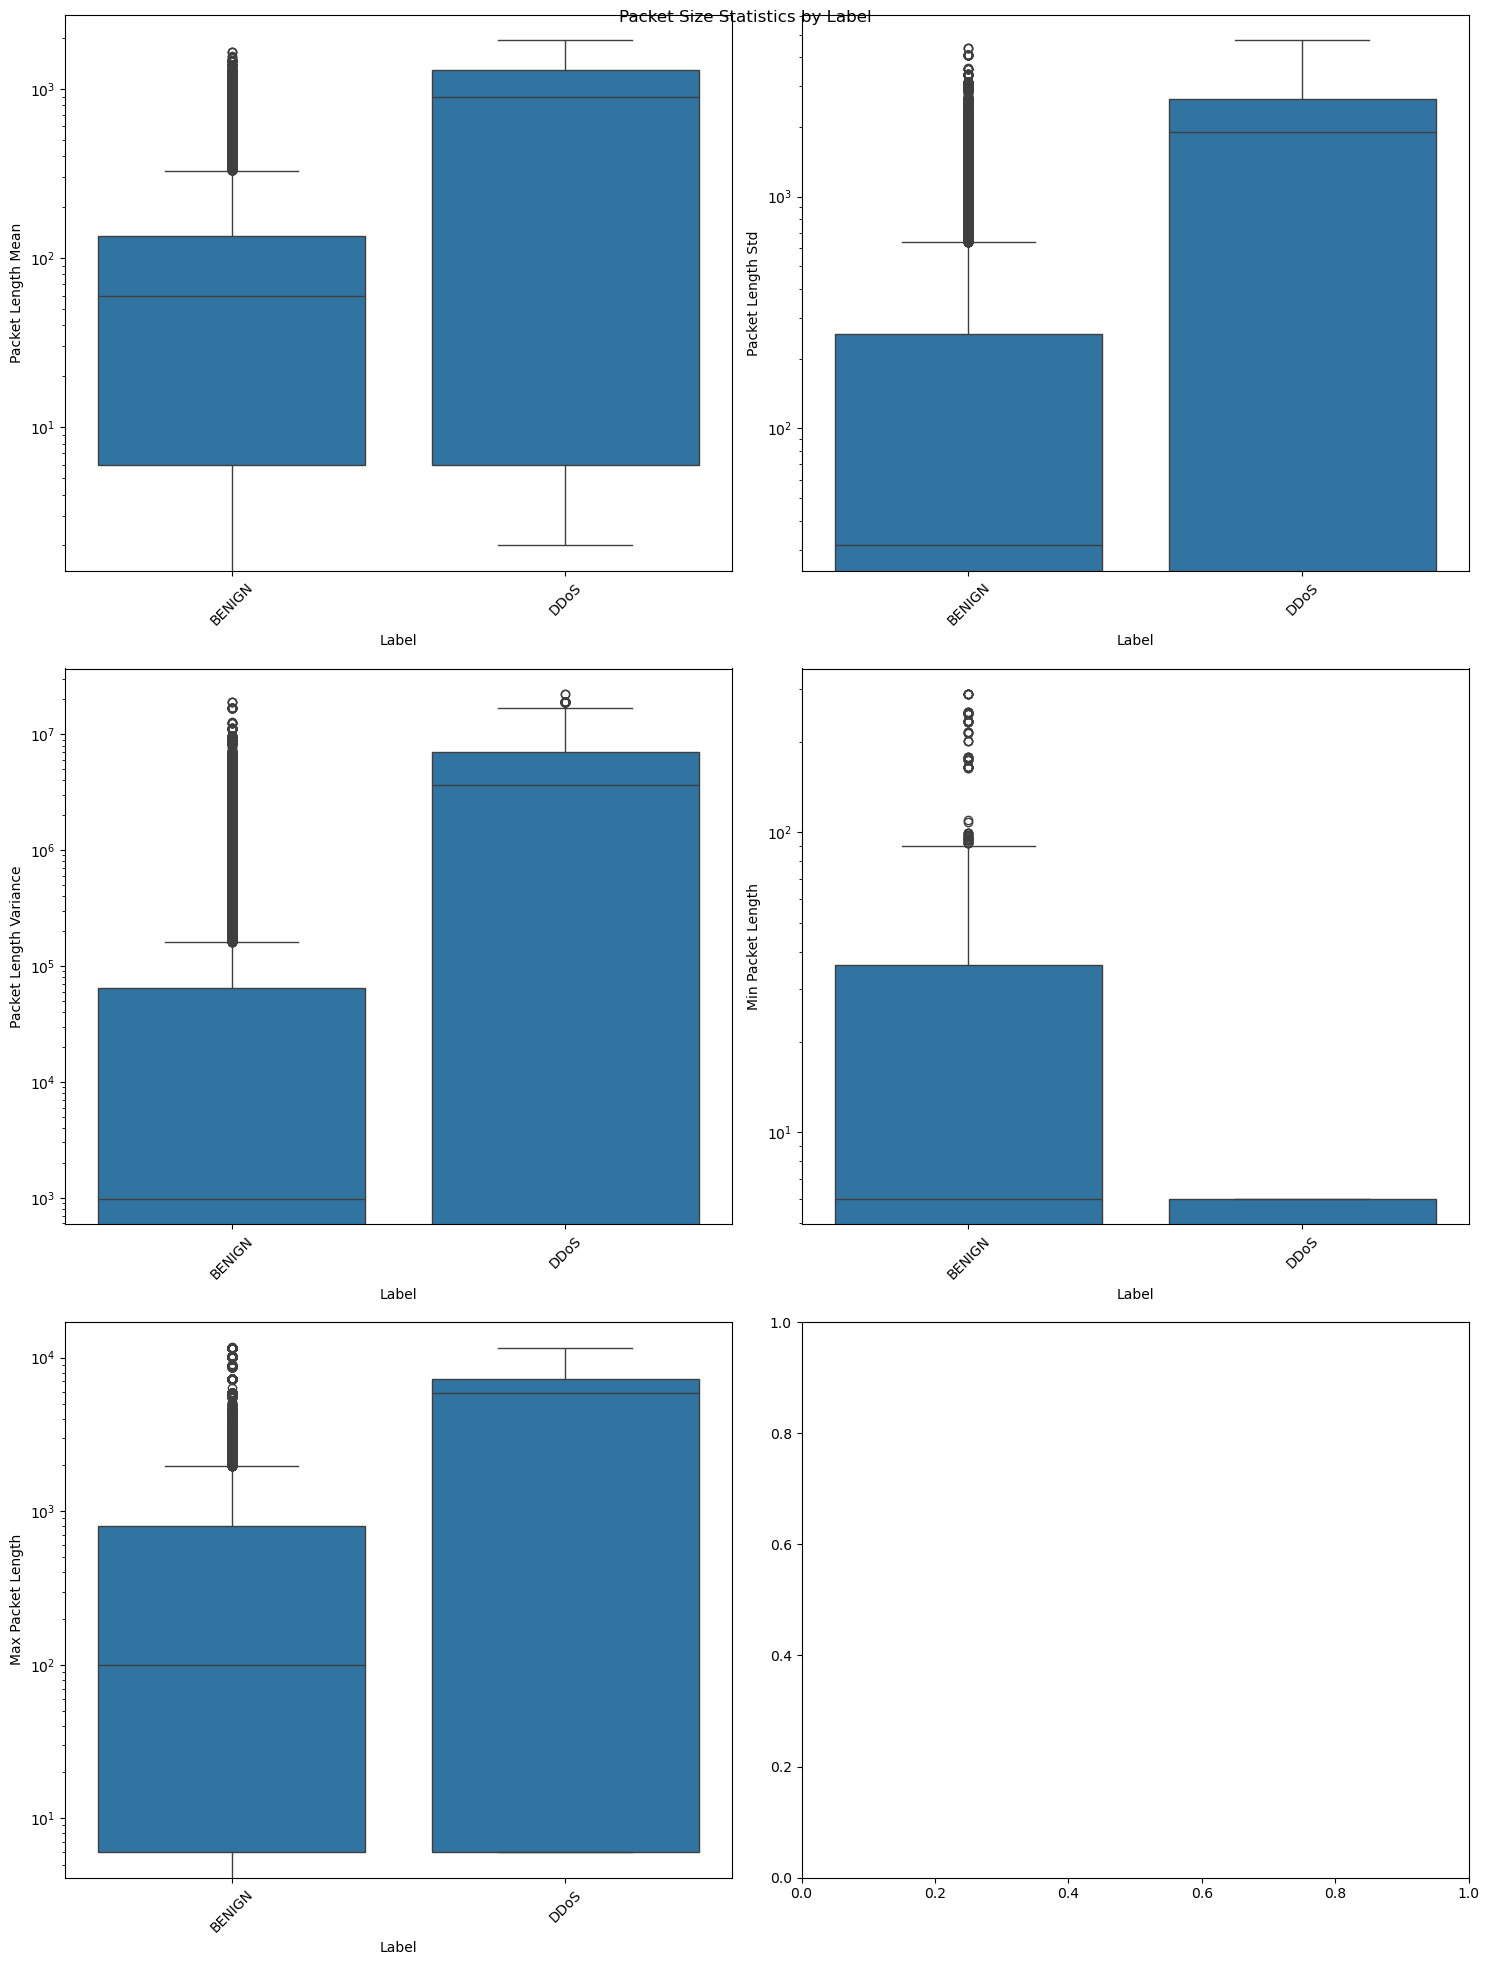

In [85]:
# Analyze packet size statistics
size_features = ['Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
                 'Min Packet Length', 'Max Packet Length']

# Create box plots for packet size features
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
fig.suptitle('Packet Size Statistics by Label')

for i, feature in enumerate(size_features):
    sns.boxplot(x='Label', y=feature, data=data_nona, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_xticklabels(axes[i//2, i%2].get_xticklabels(), rotation=45)
    axes[i//2, i%2].set_yscale('log')  # Using log scale for better visualization

plt.tight_layout()
plt.show()

In [86]:
# Calculate median values for packet size features, grouped by Label
size_medians = data_nona.groupby('Label')[size_features].median()
print("\nMedian values of packet size features by Label:")
print(size_medians)


Median values of packet size features by Label:
        Packet Length Mean  Packet Length Std  Packet Length Variance  \
Label                                                                   
BENIGN           60.000000          31.228802            9.752381e+02   
DDoS            897.615385        1903.962654            3.625074e+06   

        Min Packet Length  Max Packet Length  
Label                                         
BENIGN                6.0              100.0  
DDoS                  0.0             5840.0  


- *Packet Length Mean* - In normal traffic, the average packet size is around 60 bytes. During a DDoS attack, the average packet size is much larger, around 898 bytes. This could be due to attackers sending large packets to quickly overwhelm the network 897.6 bytes. This suggests a "volumetric" DDoS attack, where the goal is to overwhelm the target with a high volume of data to overload systems with larger packets.
- *Packet Length Std (Standard Deviation)* -  In normal traffic, the packet sizes vary by about 31 bytes from the mean. This indicates that the packet sizes are relatively consistent, with only small variations.  During a DDoS attack, the packet sizes vary greatly, with a standard deviation of 1904 bytes. This shows that the packet sizes are highly inconsistent, likely due to a mix of very small and very large packets.
- *Packet Length Variance* - The packet size variance during a DDoS attack is extremely high, at over 3.6 million. This reflects the huge inconsistency in packet sizes, which is a hallmark of attack traffic.
- *Min Packet Length* - The smallest packet in normal traffic is 6 bytes, likely representing a small control or acknowledgment packet. During a DDoS attack, the smallest packet can be 0 bytes. This might be an indication of malformed or empty packets being sent to disrupt the network.
- *Max Packet Length* - During a DDoS attack, the largest packet can be as large as 5840 bytes. This shows that attackers may send very large packets to quickly consume network resources and cause congestion.

